# LOAN PREDICTION

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np             # For mathematical calculations
import seaborn as sns          # For data visulization
import matplotlib.pyplot as plt           # For plotting graphs
%matplotlib inline
import warnings                           # To ignore any warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv') 

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
#Checking for features present in our dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
#Print the datatype for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Checking for the shape of our dataset
train.shape, test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in terst dataset.

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Univariate Analysis

For  categorical features we can use frequency table or bar plots while for numerical features, we can use probability density plots

In [9]:
#Target Variable(Loan_Status)
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#Normalize can be set to True to print proportions instead of numbers
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

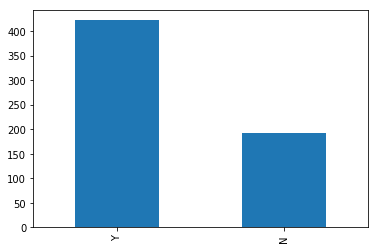

In [11]:
train['Loan_Status'].value_counts().plot.bar()

The loan of 422(approximately 69%)people out of 614 was approved.

#### Independent Variable(Categorical)

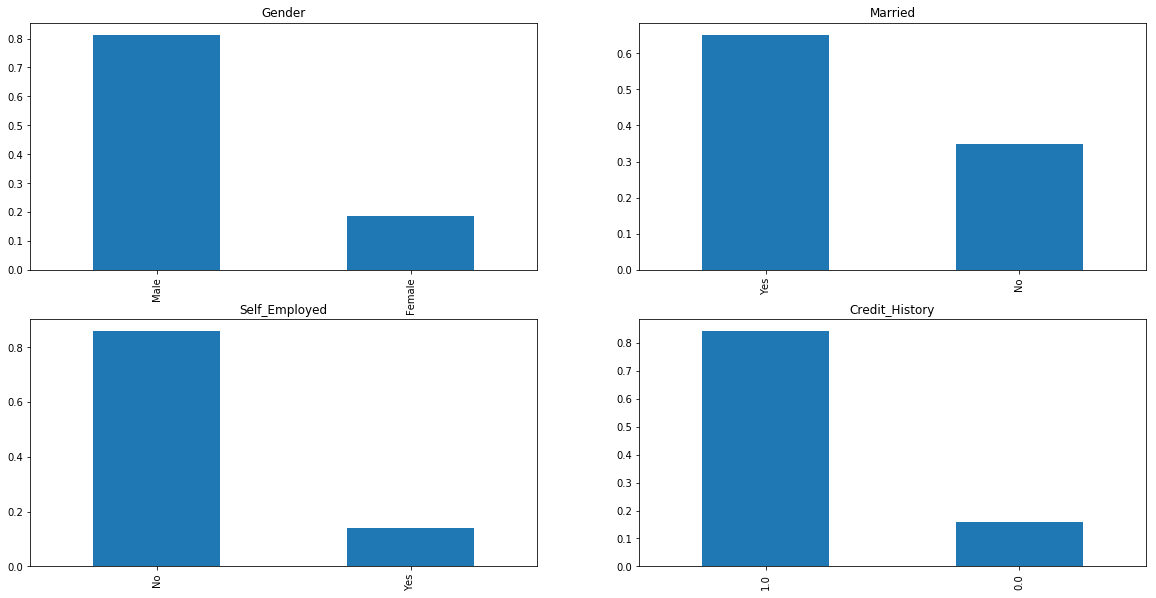

In [12]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Credit_History')

#### Independent Variable(Ordinal)

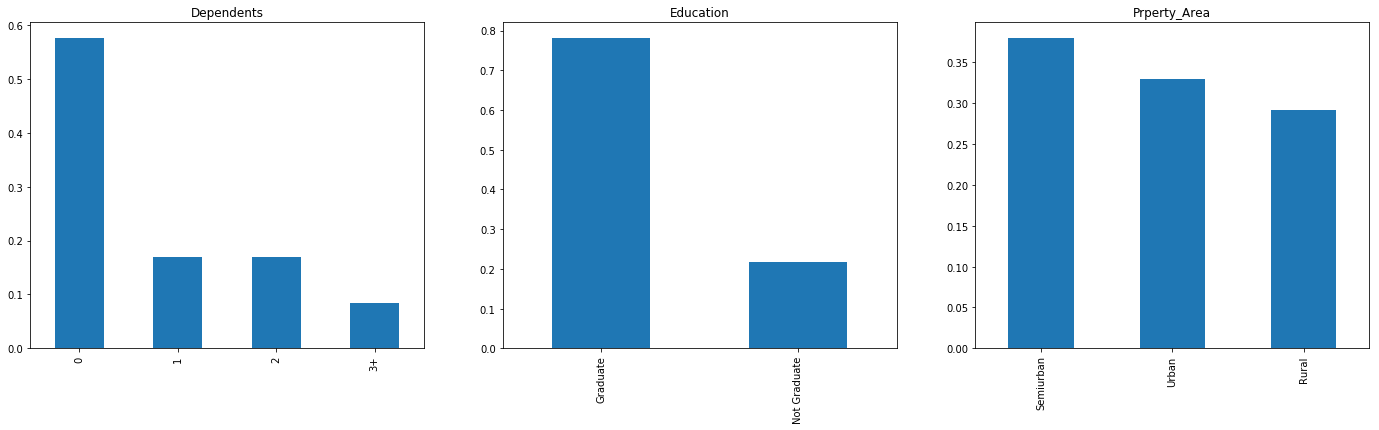

In [13]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Prperty_Area')

#### Independent Variable(Numerical)

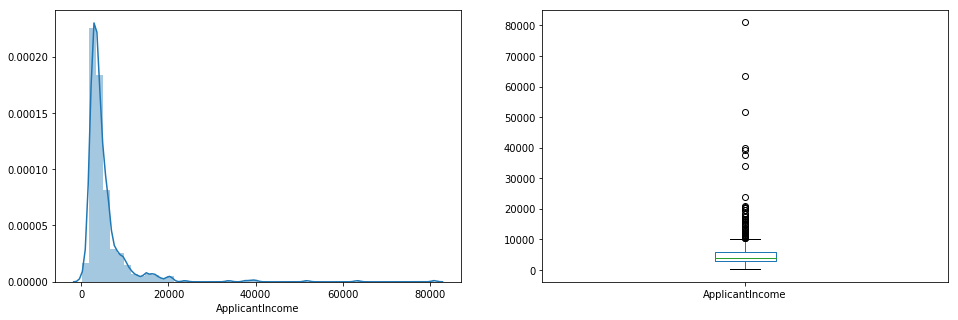

In [14]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to normalize it because algorithms works better if the dat is normally distributed.

The boxplot confirms the presence of outliers/extreme values. This can be as a result of income disparity in the society. This an be because we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

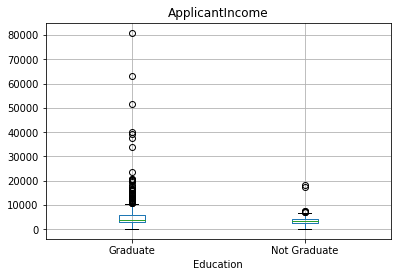

In [15]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')

We can see that a higher numbee of graduates with very high incomes, which are appearing as outliers.

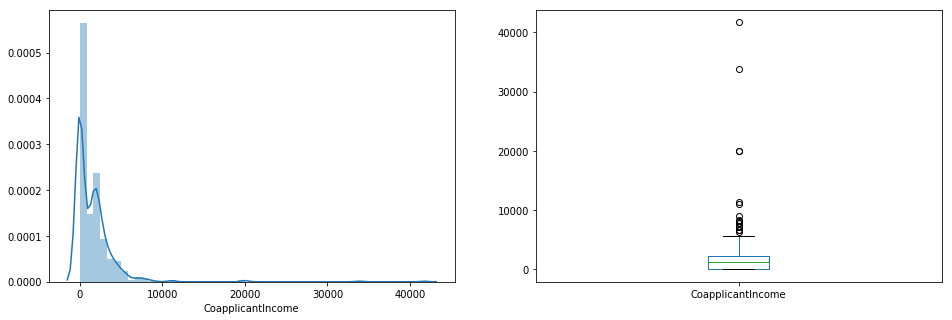

In [16]:
#Let's look at the Coapplicant income distribution.
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

We have a similar distribution as that of the applicant income. Majority of Coapplicant's income ranges from 0 to 5000 and a lot of outliers here. It is not normally distributed

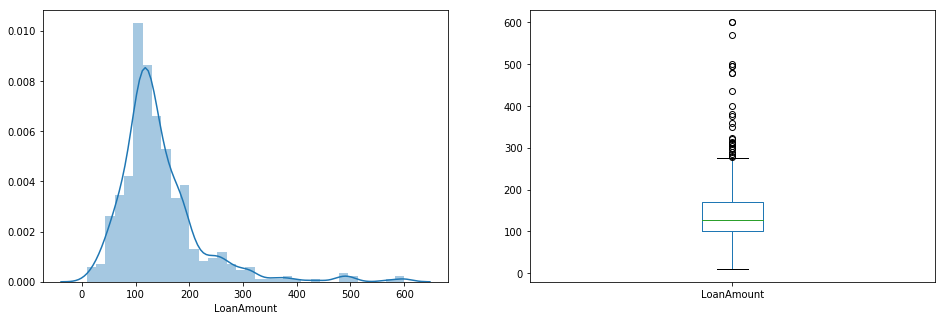

In [17]:
#Let's look at the distribution of LoanAmount variable.
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

We have a lot of outliers in this variable and the distribution is fairly normal. We will treat the outlierss later.

### Bivariate Analysis

#### Categorical Independent Variable vs Target

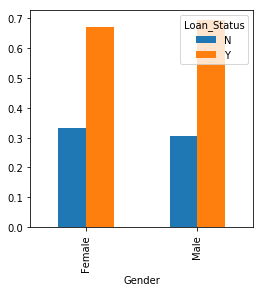

In [18]:
#First let's look at the bar plot which will give us the proportion of approved and unapproved loans.
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

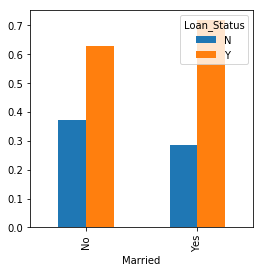

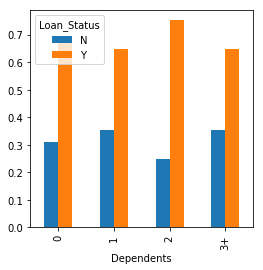

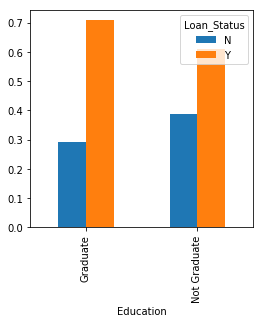

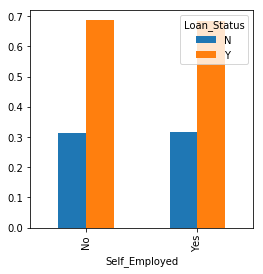

In [19]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

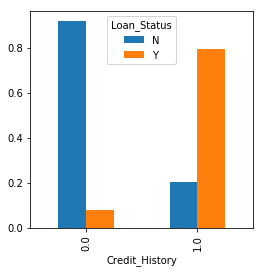

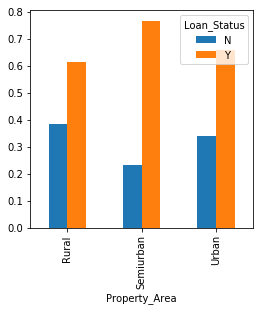

In [20]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(4,4))

#### Numerical Independent Variable vs Target Variable

We try to find the mean income of people that their loan has been approved vs mean income of people their loan has not been approved.

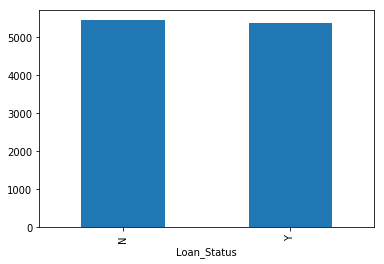

In [21]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

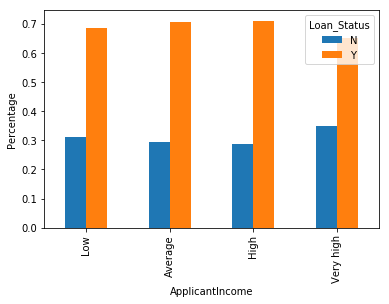

In [22]:
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'], bins, labels=group)

Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar')
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')


Text(0, 0.5, 'Percentage')

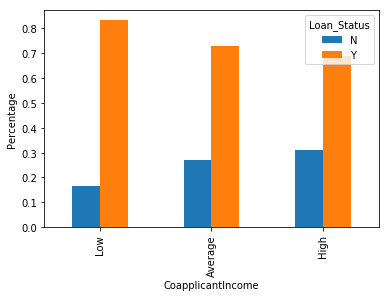

In [23]:
bins=[0,1000,3000,42000]
group=['Low', 'Average', 'High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'], bins, labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if a coapplicant income is less, the the chances of loan approval are high. But doesnt look right. This may be due to the fact that most applicants don't have coapplicant so the coapplicant income for such is 0 and hence the loan approval is not dependent on it.

So we will make a new variable in which we will combine both applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

Text(0, 0.5, 'Percentage')

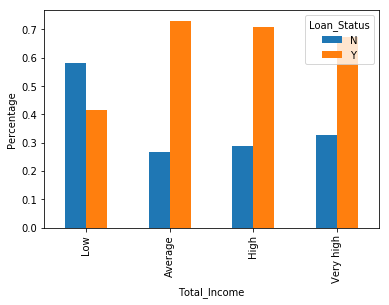

In [24]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar')
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

We can see that the proportion of loans getting approved for applicants having low Total_Income is less compared to that of applicants with Average, high, and Very High Income.

Text(0, 0.5, 'Percentage')

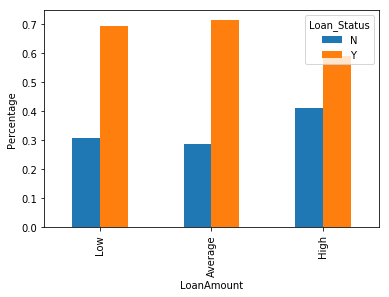

In [25]:
# Visualize the Loan amount variable
bins=[0,100,200,700]
group=['Low', 'Average', 'High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'], bins, labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar')
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average LoanAmount compaared to that of High LoanAmount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let's drop bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable's categories into 0 and 1 so that we can find its correlation with numerical variables.

In [26]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+',3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)
train['Loan_Status'].replace('N',0, inplace=True)
train['Loan_Status'].replace('Y',1, inplace=True)

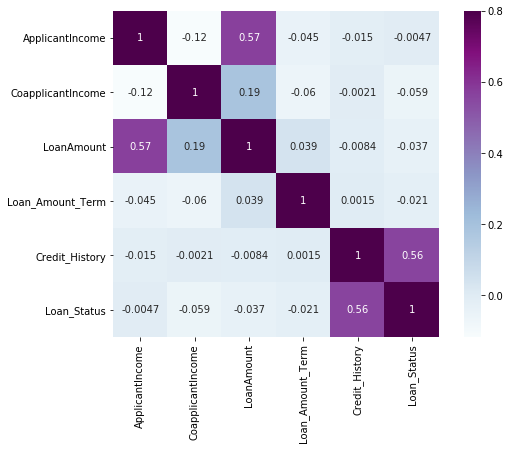

In [27]:
# Looking at the correlation between all the numerical variables using the heatmap to visulize the correlation. 
matrix=train.corr() 
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, annot=True, cmap='BuPu')

### Missing Value Imputation

In [28]:
# Checking for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amoiunt_Term and Credit_History features

In [29]:
# We will treat the missing values in all the features one by one
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [30]:
# Let's check for Loan_Amount_Term by using the value count 
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [32]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [33]:
# Checking to know if all the missing values in the dataset have been filled
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [35]:
# We do same for the test dataset by filling all the missing values
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

### Outlier Treatment

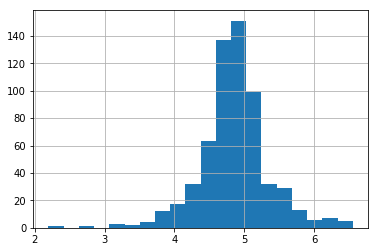

In [36]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution looks more of normal and effect of extreme values have been significantly subsided.

In [37]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

### Model Building

In [38]:
# Let us drop the loan_ID column because it has no effect on the loan status
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

In [39]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [40]:
# We createdummy variables for categorical variables
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [41]:
# Using the train test split model to create train and validation dataset
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y, test_size=0.3)

#### Logistics Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
pred_val = lr.predict(x_val)

In [45]:
accuracy_score(y_val, pred_val)

0.8054054054054054

In [46]:
# Let's make our predictions for the test dataset
#pred_test = lr.predict(test)

In [47]:
# Importing Stratified K-fold cross validation to check how robust our model is to unseen data
from sklearn.model_selection import StratifiedKFold

In [48]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtrain,xval = X.loc[train_index], X.loc[test_index]
    ytrain,yval = y[train_index], y[test_index]

    lr=LogisticRegression(random_state=1)
    lr.fit(xtrain, ytrain)
    pred_test = lr.predict(xval)
    score = accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = lr.predict(test)
    pred=lr.predict_proba(xval)[:,1]



1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


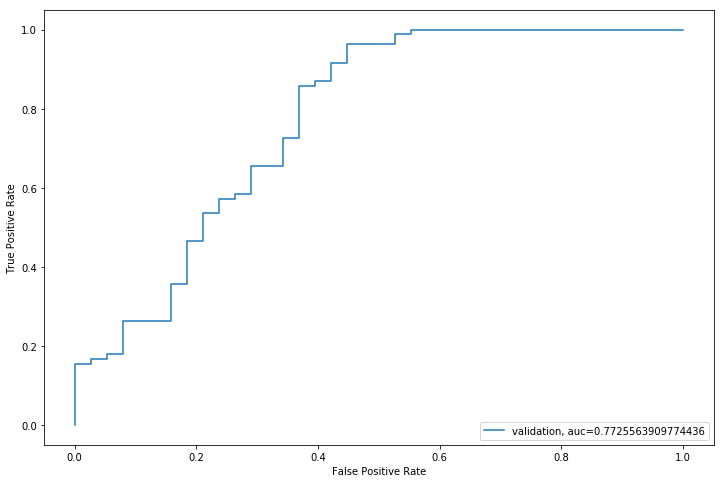

In [49]:
# Lets visualize the ROC curve
from sklearn import metrics 
fpr, tpr, _ =metrics.roc_curve(yval, pred)
auc = metrics.roc_auc_score(yval, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Feature Engineering

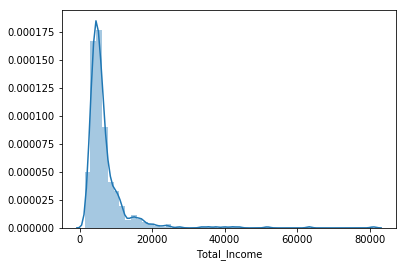

In [50]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

From the graph, it is skewed towards left so let's take the log transformation to make the distribution normal.

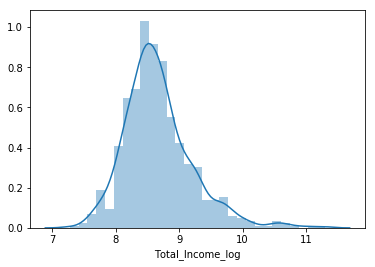

In [51]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

sns.distplot(train['Total_Income_log'])

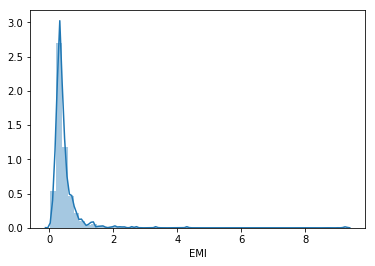

In [52]:
#Let's create for EMI feature
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']


sns.distplot(train['EMI'])

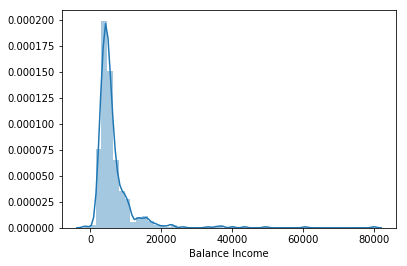

In [53]:
# Let's create Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)   #Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income'])

In [54]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [55]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status

#### Logistics Regression

In [56]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtrain,xval = X.loc[train_index], X.loc[test_index]
    ytrain,yval = y[train_index], y[test_index]

    lr=LogisticRegression(random_state=1)
    lr.fit(xtrain, ytrain)
    pred_test = lr.predict(xval)
    score = accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = lr.predict(test)
    pred=lr.predict_proba(xval)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


#### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtrain,xval = X.loc[train_index], X.loc[test_index]
    ytrain,yval = y[train_index], y[test_index]

    rfc=RandomForestClassifier(random_state=1, max_depth=10)
    rfc.fit(xtrain, ytrain)
    pred_test = rfc.predict(xval)
    score = accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    
    pred_test = rfc.predict(test)


1 of kfold 5
accuracy_score 0.8225806451612904

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.8114754098360656


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1,20, 2)), 'n_estimators': list(range(1,200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)

In [63]:
# Fit the grid search model
grid_search.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
#Estimatinf the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [65]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtrain,xval = X.loc[train_index], X.loc[test_index]
    ytrain,yval = y[train_index], y[test_index]

    rfc=RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
    rfc.fit(xtrain, ytrain)
    pred_test = rfc.predict(xval)
    score = accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    
    pred_test = rfc.predict(test)


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


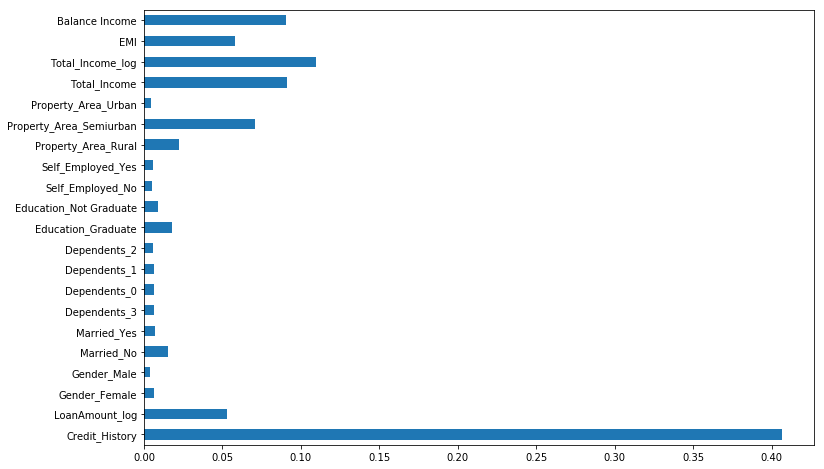

In [66]:
# Let's find the features importance
fea_importances = pd.Series(rfc.feature_importances_, index=X.columns)
fea_importances.plot(kind='barh', figsize=(12,8))

#### XGBOOST

In [67]:
from xgboost import XGBClassifier

In [68]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtrain,xval = X.loc[train_index], X.loc[test_index]
    ytrain,yval = y[train_index], y[test_index]

    xgb=XGBClassifier(random_state=1, max_depth=4, n_estimators=50)
    xgb.fit(xtrain, ytrain)
    pred_test = xgb.predict(xval)
    score = accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    
    pred_test = xgb.predict(test)
    pred3=xgb.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7622950819672131

4 of kfold 5
accuracy_score 0.7459016393442623

5 of kfold 5
accuracy_score 0.7868852459016393


In [69]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1,20, 2)), 'n_estimators': list(range(1,200, 20))}
grid_search=GridSearchCV(XGBClassifier(random_state=1), paramgrid)

# Fit the grid search model
grid_search.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
#Estimating the optimized value
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=81, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [71]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtrain,xval = X.loc[train_index], X.loc[test_index]
    ytrain,yval = y[train_index], y[test_index]

    xgb=XGBClassifier(random_state=1, max_depth=1, n_estimators=81)
    xgb.fit(xtrain, ytrain)
    pred_test = xgb.predict(xval)
    score = accuracy_score(yval,pred_test)
    print('accuracy_score',score)
    i+=1
    
    pred_test_data = xgb.predict(test)
    pred3=xgb.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8360655737704918


#### From our different algorithms, XGBOOST with the grid search cv best estimator gave us the best result.